In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np

# Dataset



In [2]:
data = 'dataset/train'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df                                                            #display dataframe

,Class,Images
0,ayam-bakar,ayam-bakar (100).jpeg
1,ayam-bakar,ayam-bakar (33).jpeg
2,ayam-bakar,ayam-bakar (34).jpeg
3,ayam-bakar,ayam-bakar (35).jpeg
4,ayam-bakar,ayam-bakar (36).jpeg
...,...,...
5213,tumis-tauge,tumis-tauge (470).jpeg
5214,tumis-tauge,tumis-tauge (471).jpeg
5215,tumis-tauge,tumis-tauge (472).jpeg
5216,tumis-tauge,tumis-tauge (461).jpeg


In [3]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 5218
Class Count : 30 

Count the number of images in each class
bawal-goreng             205
gulai-kambing            205
lele-goreng              203
tahu                     200
gorengan                 200
seblak                   198
nasi-putih               192
tumis-tauge              190
bakso                    184
soto-ayam                182
opor-ayam                181
terong-balado            179
tempe                    179
sosis                    179
rawon                    177
ayam-bakar               176
nasi-goreng              175
bandeng-goreng           173
telur-goreng             162
bubur-ayam               162
gado                     160
tumis-kangkung           159
rendang                  157
tempe-orek               156
ayam-goreng              154
mie-ayam                 152
telur-balado             152
sate                     150
sambal-goreng-kentang    144
roti                     132
Name: Class, dty

# Exploratory Data Analysis (EDA)

#### Identify the count of each class using barchart

Text(0, 0.5, 'Count Image')

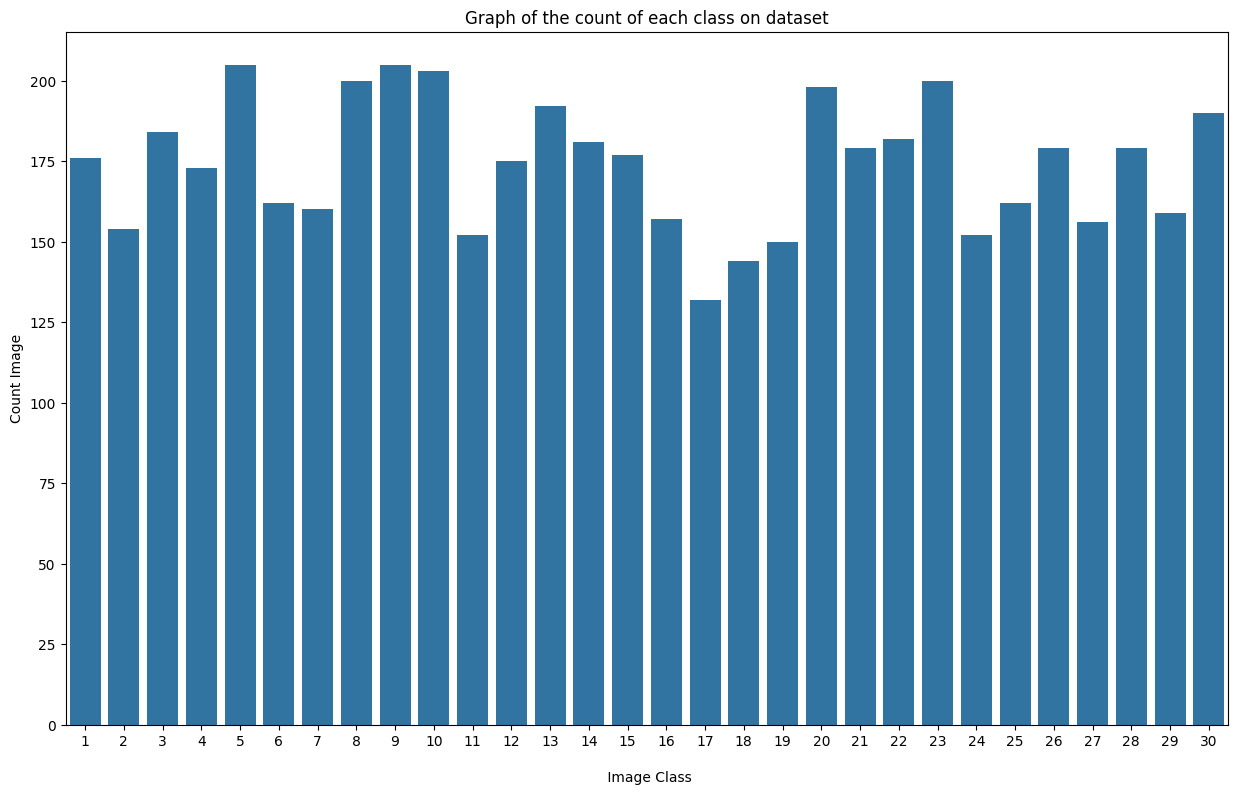

In [9]:
class_mapping = {class_name: i for i, class_name in enumerate(df['Class'].unique(), 1)}
df['Class_numeric'] = df['Class'].map(class_mapping)

fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(data=df, x='Class_numeric', ax=ax)
plt.title('Graph of the count of each class on dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

#### Plotting image size

In [7]:
# Automatically create directories dictionary from folder names
directories = {folder: os.path.join(data, folder) + '/' for folder in os.listdir(data)}

def get_dims(file):
    with Image.open(file) as im:
        if im.mode != 'RGB':
            im = im.convert('RGB')
        arr = np.array(im)
        h, w, d = arr.shape
    return h, w

[########################################] | 100% Completed | 4.59 ss
[########################################] | 100% Completed | 4.85 ss
[########################################] | 100% Completed | 3.75 ss
[########################################] | 100% Completed | 4.22 ss
[########################################] | 100% Completed | 4.82 ss
[########################################] | 100% Completed | 4.07 ss
[########################################] | 100% Completed | 3.67 ss
[########################################] | 100% Completed | 4.20 ss
[########################################] | 100% Completed | 4.52 ss
[########################################] | 100% Completed | 4.34 ss
[########################################] | 100% Completed | 4.69 ss
[########################################] | 100% Completed | 4.72 ss
[########################################] | 100% Completed | 4.64 ss
[########################################] | 100% Completed | 3.49 ss
[###################

c:\Users\Asus\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


[########################################] | 100% Completed | 4.50 ss
[########################################] | 100% Completed | 3.56 ss
[########################################] | 100% Completed | 3.78 ss
[########################################] | 100% Completed | 4.47 ss
[########################################] | 100% Completed | 4.26 ss
[########################################] | 100% Completed | 4.72 ss
[########################################] | 100% Completed | 3.85 ss
[########################################] | 100% Completed | 3.24 ss
[########################################] | 100% Completed | 5.10 ss


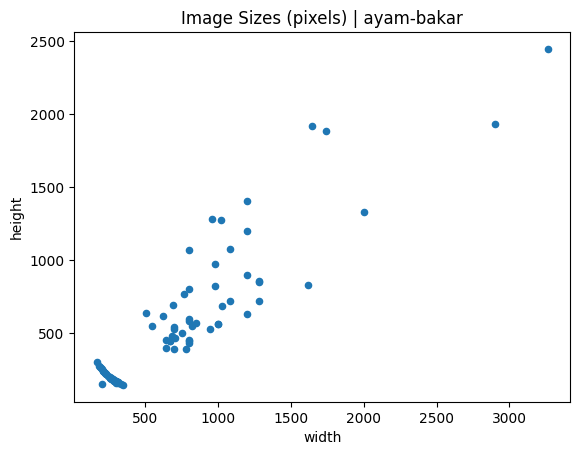

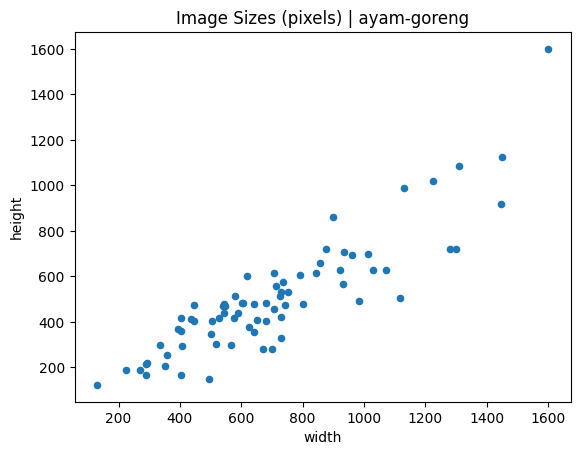

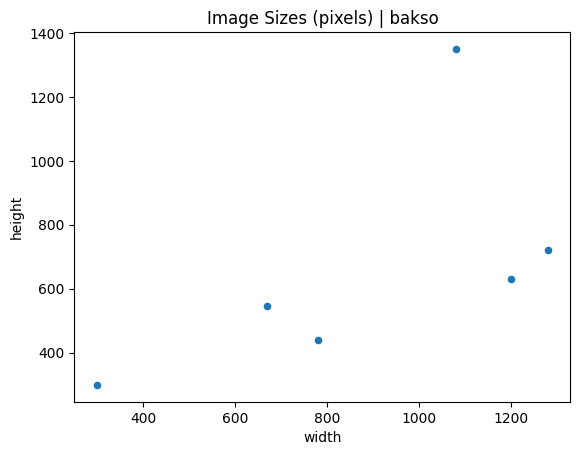

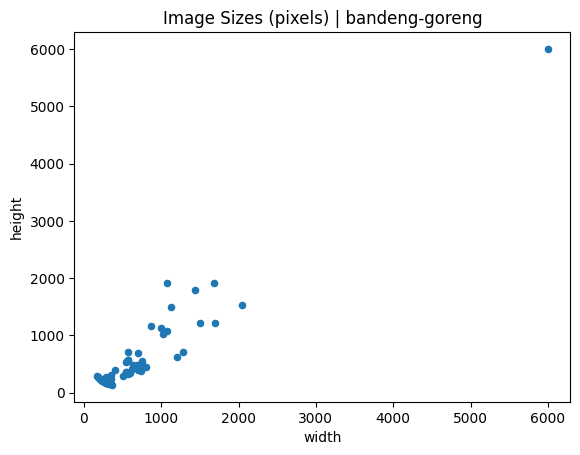

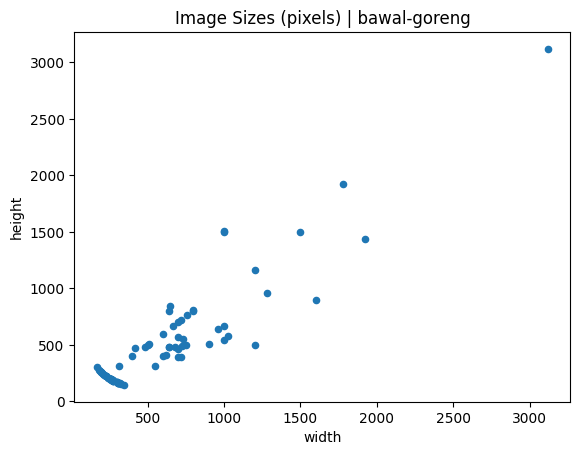

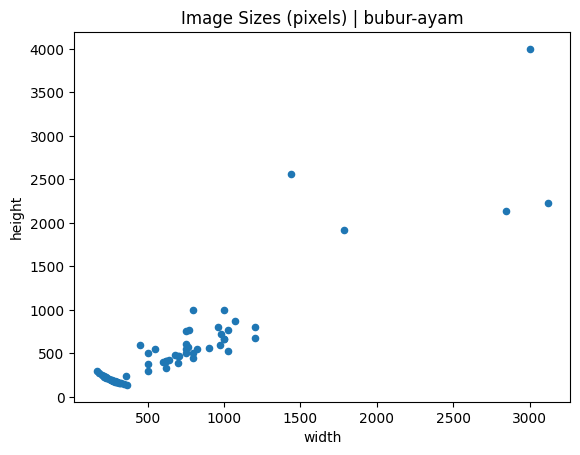

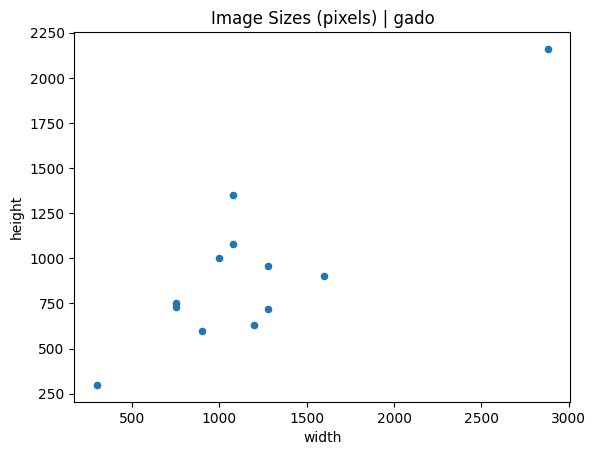

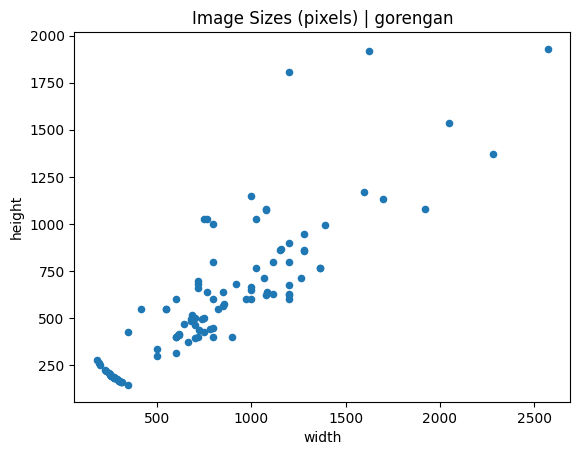

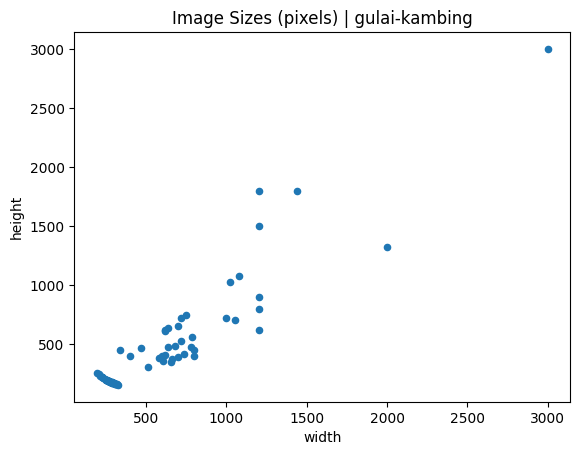

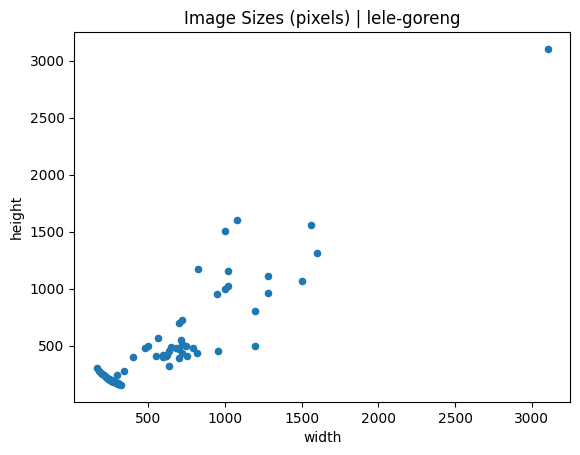

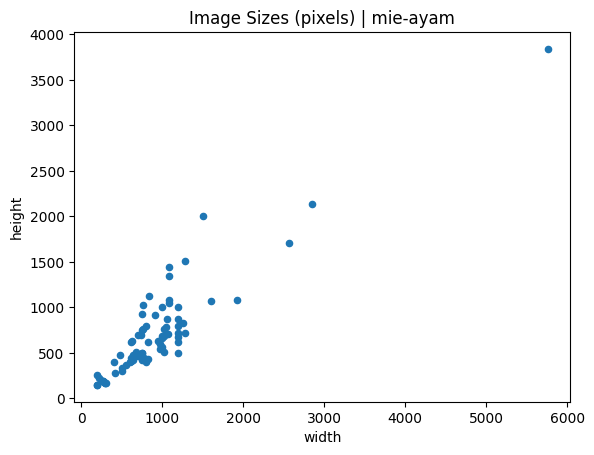

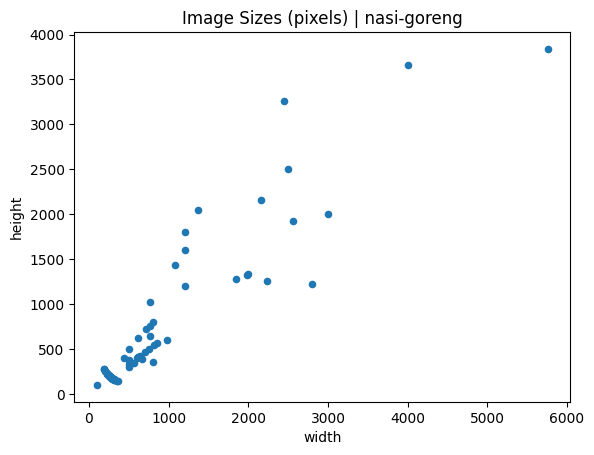

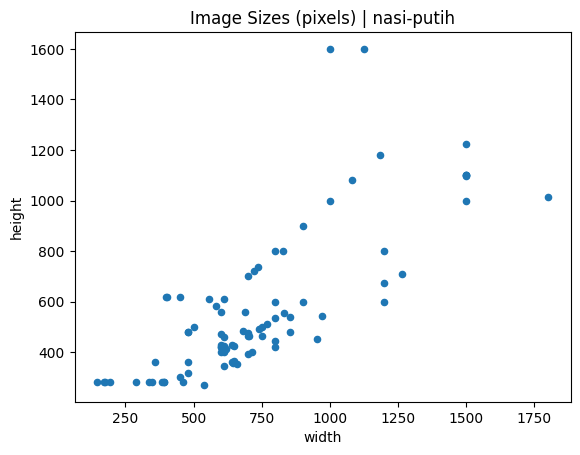

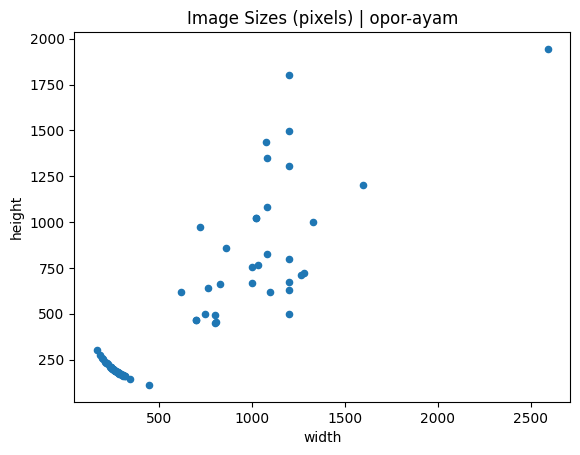

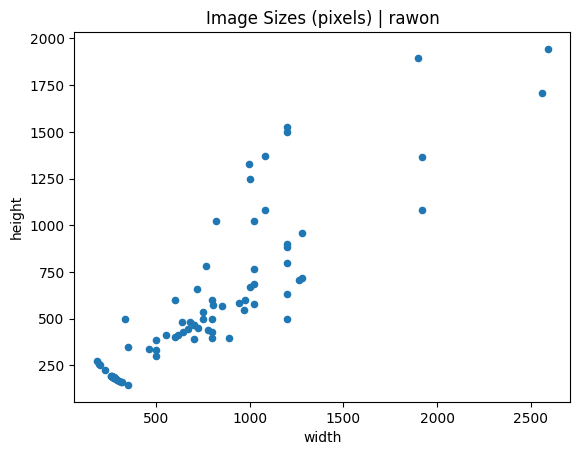

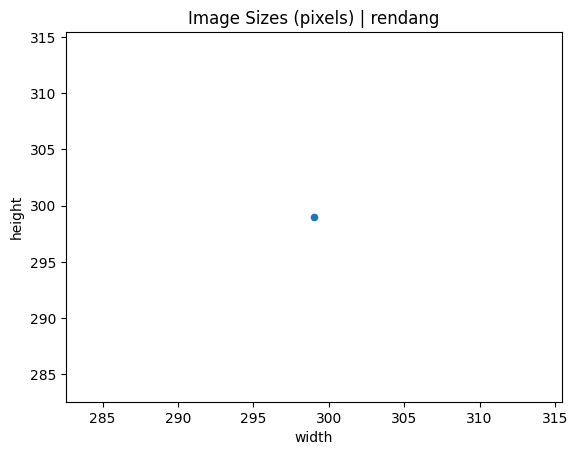

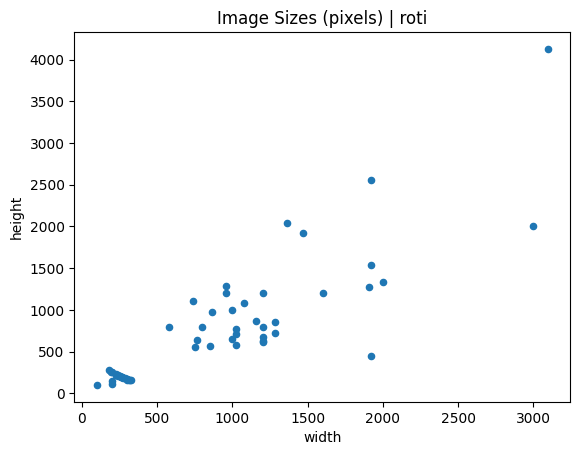

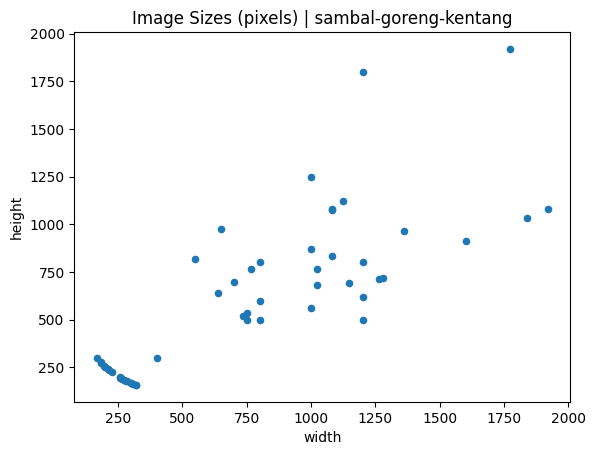

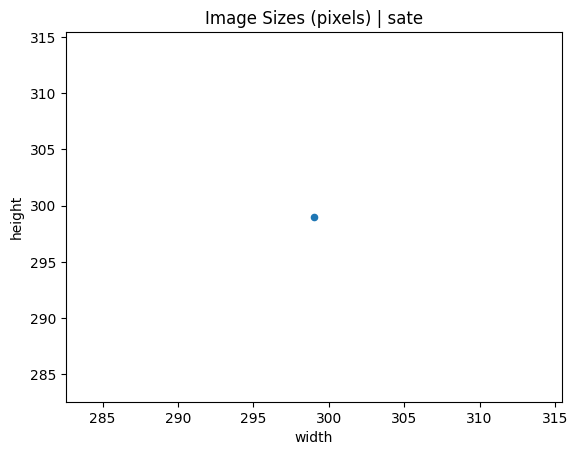

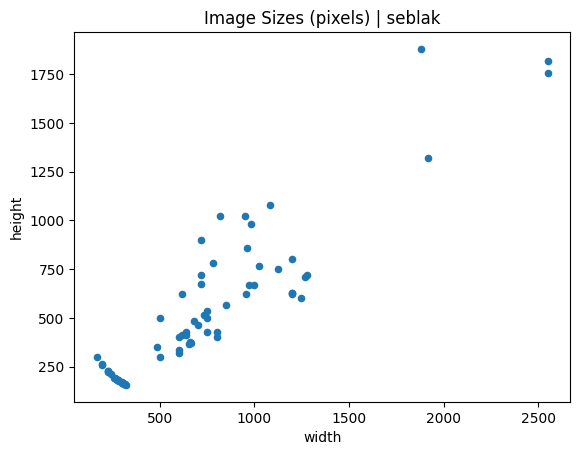

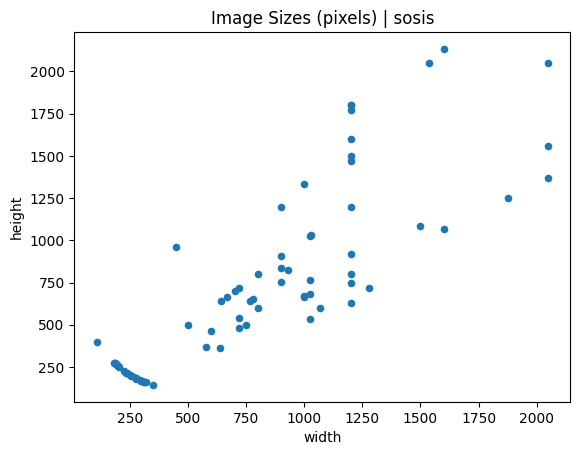

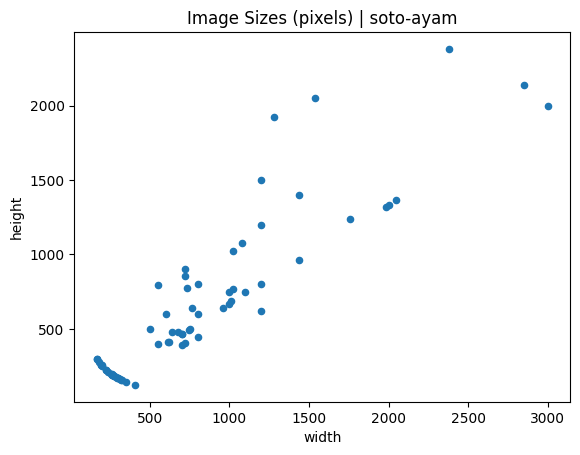

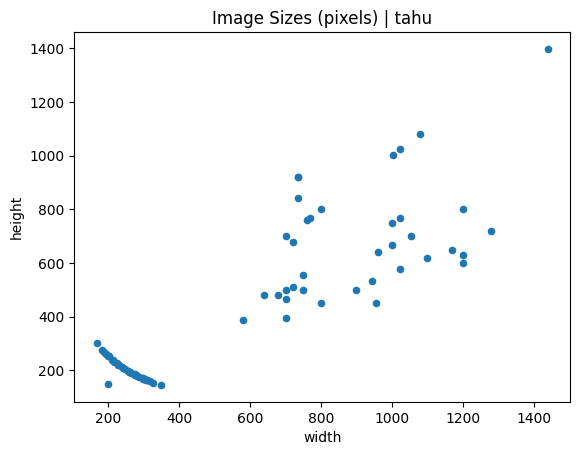

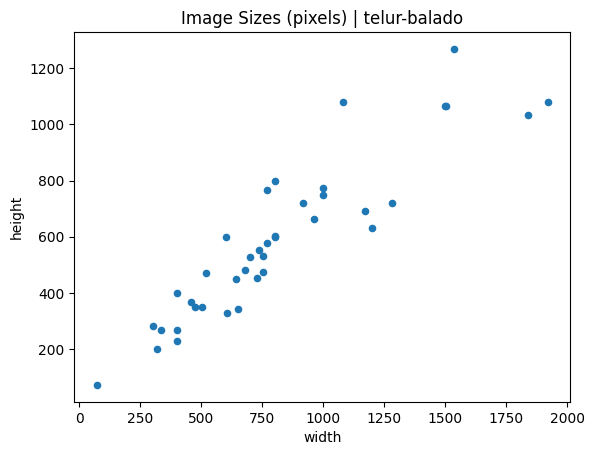

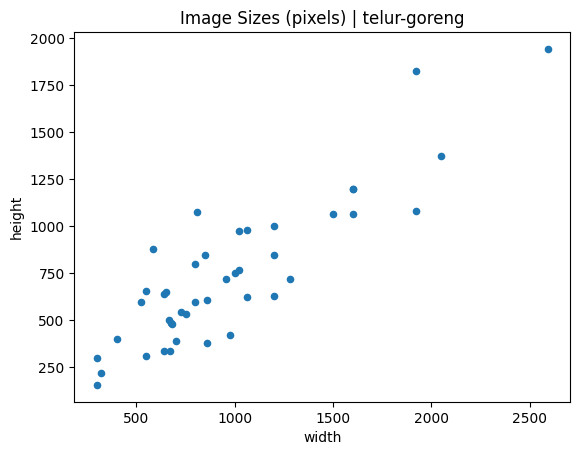

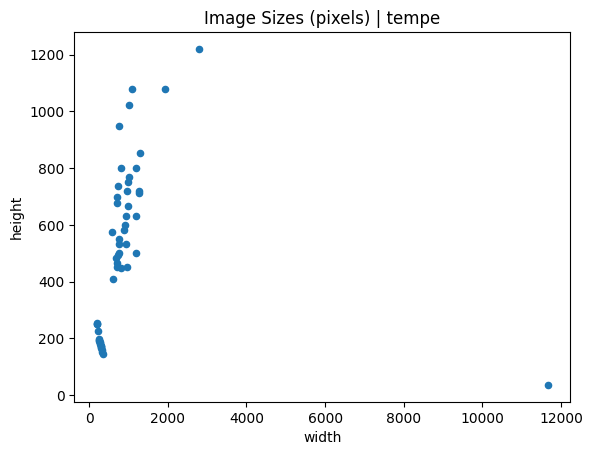

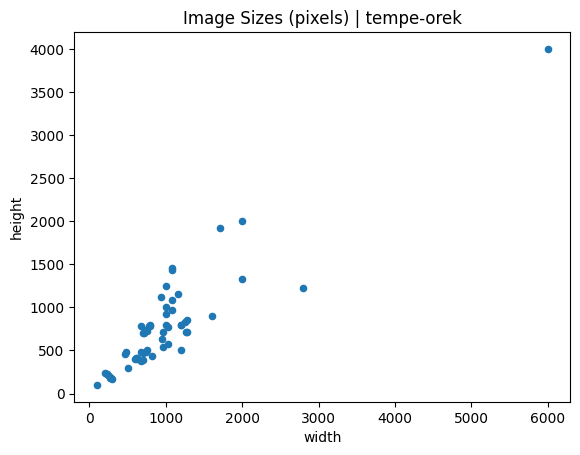

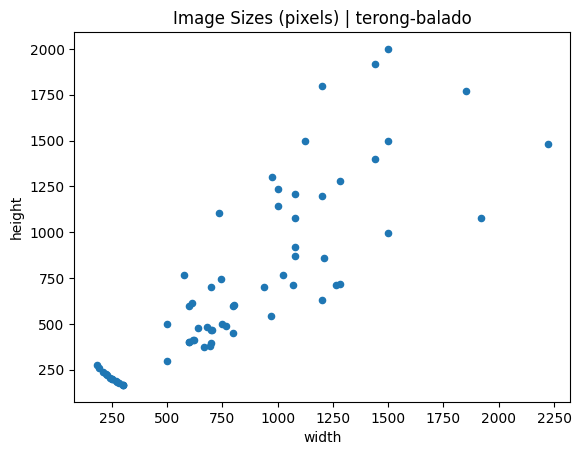

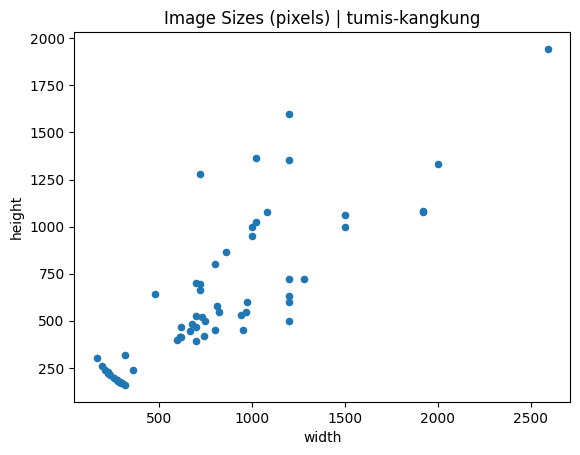

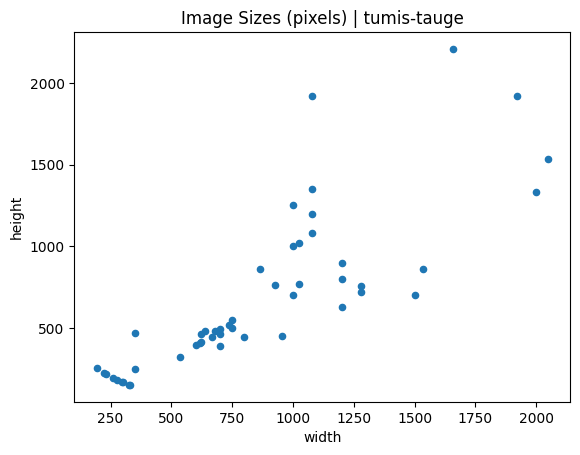

In [8]:
# Iterate through directories and process images
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)

  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))